<a href="https://colab.research.google.com/github/JaylenLuc/ML_climate_classification/blob/main/kmeansClimate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
!pip install scikit-learn


# Per City Data classification Using K means

In [84]:
#REFERENCED https://github.com/guszejnovdavid/City_Climate

import numpy as np
import pandas as pd
from tabulate import tabulate
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from sklearn.preprocessing import StandardScaler

# def percentile_scaler(arr, percentile_low = 10, percentile_high = 90, axis=0):
#     low = np.nanpercentile(arr, percentile_low, axis = axis)
#     median = np.nanpercentile(arr, 50, axis = axis)
#     high = np.nanpercentile(arr, percentile_high, axis = axis)
#     scale = high - low
#     return (arr - median)/scale
# from utility_functions import *
sns.set()
%matplotlib inline
worldmap = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df = pd.read_csv('sample_data/city_climate_dataframe.csv', low_memory=False)
df.set_index('Key',inplace=True)
print(df['Country'].str.contains('China').any())
def dew_point(temp, rh):
    return np.array(np.array(temp) - ((100 - np.array(rh))/5))
#df.fillna(value={'State':''}, inplace=True)
for i in range(1,13):
  #T - ((100 - RH)/5)
  df['Dew Point, month %d'%(i)] = dew_point(df['Average Temperature, month %d'%(i)], df['Average Relative Humidity, month %d'%(i)])

# def apparent_temp(T, RH, vw):
#     return np.array(mpcalc.apparent_temperature(np.array(T) * units.degC, np.array(RH) * units.percent, np.array(vw) * units.kilometer / (units.hour), mask_undefined = False ))
# for i in range(1,13):
#     df['Apparent Temperature, month %d'%(i)] = apparent_temp(df['Average Temperature, month %d'%(i)],\
#                                                              df['Average Relative Humidity, month %d'%(i)],\
#                                                              df['Average Wind Speed, month %d'%(i)])
print(len(df.index))
def percentile_scaler(arr, percentile_low = 5, percentile_high = 95, axis=0):
    low = np.nanpercentile(arr, percentile_low, axis = axis)
    median = np.nanpercentile(arr, 50, axis = axis)
    high = np.nanpercentile(arr, percentile_high, axis = axis)
    scale = high - low
    return (arr - median)/scale
df_copy = df.copy()
scaler = StandardScaler()

df.drop(['City', 'State', 'Country', 'Region', 'Latitude', 'Longitude'], axis=1, inplace=True) #'Latitude', 'Longitude'
# scaler.fit(df)
# df = scaler.transform(df)

norm_type = True
if norm_type:
  #standard scaler
  df = pd.DataFrame(scaler.fit_transform(df),columns = df.columns)
else:
  #using percentile scaling
  df = percentile_scaler(df)



df.head()

<ipython-input-84-f410000d9790>:23: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


True
14343


Elevation  Average Temperature, month 1  Average Temperature, month 2  \
0   0.221183                     -0.007026                      0.133127   
1   0.783533                     -0.710245                     -0.665178   
2   0.502588                     -0.223401                     -0.132975   
3  -0.215433                     -0.401138                     -0.328638   
4   1.226137                     -0.331588                     -0.250373   

   Average Temperature, month 3  Average Temperature, month 4  \
0                      0.399534                      0.792841   
1                     -0.519383                     -0.316046   
2                      0.054940                      0.319142   
3                     -0.165953                      0.146887   
4                     -0.059924                      0.189951   

   Average Temperature, month 5  Average Temperature, month 6  \
0                      1.275264                      1.879759   
1                     -0.145642                      0.338234   
2                      0.666304                      1.246923   
3                      0.490383                      0.987297   
4                      0.449785                      0.889938   

   Average Temperature, month 7  Average Temperature, month 8  \
0                      2.114341                      1.770932   
1                      0.590441                      0.406271   
2                      1.508453                      1.178382   
3                      1.269770                      0.926997   
4                      1.141248                      0.891085   

   Average Temperature, month 9  ...  Dew Point, month 3  Dew Point, month 4  \
0                      1.076364  ...           -0.000561            0.205006   
1                     -0.046770  ...           -0.541156           -0.352512   
2                      0.630187  ...           -0.165332           -0.016266   
3                      0.368636  ...           -0.132007            0.085693   
4                      0.307094  ...           -0.376386           -0.326480   

   Dew Point, month 5  Dew Point, month 6  Dew Point, month 7  \
0            0.303763            0.458446            0.468810   
1           -0.515249           -0.664350           -0.731443   
2           -0.072824            0.033859            0.006623   
3           -0.051756           -0.113960           -0.111610   
4           -0.488914           -0.469355           -0.319416   

   Dew Point, month 8  Dew Point, month 9  Dew Point, month 10  \
0            0.142369           -0.282740            -0.366996   
1           -0.931792           -1.099986            -0.976250   
2           -0.284541           -0.559968            -0.617184   
3           -0.408483           -0.629275            -0.607917   
4           -0.553081           -0.987362            -1.031847   

   Dew Point, month 11  Dew Point, month 12  
0            -0.394556            -0.348177  
1            -0.857738            -0.722879  
2            -0.610835            -0.488476  
3            -0.419438            -0.278027  
4            -0.863480            -0.637331  

[5 rows x 169 columns]

In [85]:
#adding weighting

dewpointkeys = ['Dew Point, month %d'%(i) for i in range(1,13)]
avg_temp_keys = ['Average Temperature, month %d'%(i) for i in range(1,13)]
avg_prec_keys = ['Average Precipitation, month %d'%(i) for i in range(1,13)]
avg_humid_keys = ['Average Relative Humidity, month %d'%(i) for i in range(1,13)]
num_of_days_keys = [key for key in df_copy.columns if 'Number of Days' in key]
#daytime_keys = [key for key in df.columns if ( ('Morning' in key) or ('Evening' in key))]
#df.drop(daytime_keys, axis=1, inplace=True) #we are already using the daily averages
df[num_of_days_keys] *= 0.05
df[dewpointkeys] *= 2
df[avg_prec_keys] *= 5
df[avg_temp_keys] *= 5
df.head()

Elevation  Average Temperature, month 1  Average Temperature, month 2  \
0   0.221183                     -0.035130                      0.665634   
1   0.783533                     -3.551224                     -3.325892   
2   0.502588                     -1.117005                     -0.664875   
3  -0.215433                     -2.005688                     -1.643190   
4   1.226137                     -1.657942                     -1.251864   

   Average Temperature, month 3  Average Temperature, month 4  \
0                      1.997671                      3.964206   
1                     -2.596913                     -1.580231   
2                      0.274702                      1.595709   
3                     -0.829765                      0.734437   
4                     -0.299621                      0.949754   

   Average Temperature, month 5  Average Temperature, month 6  \
0                      6.376320                      9.398794   
1                     -0.728209                      1.691171   
2                      3.331522                      6.234613   
3                      2.451913                      4.936487   
4                      2.248927                      4.449689   

   Average Temperature, month 7  Average Temperature, month 8  \
0                     10.571705                      8.854660   
1                      2.952206                      2.031356   
2                      7.542266                      5.891909   
3                      6.348851                      4.634984   
4                      5.706242                      4.455423   

   Average Temperature, month 9  ...  Dew Point, month 3  Dew Point, month 4  \
0                      5.381818  ...           -0.001123            0.410012   
1                     -0.233849  ...           -1.082311           -0.705023   
2                      3.150937  ...           -0.330663           -0.032531   
3                      1.843179  ...           -0.264015            0.171386   
4                      1.535471  ...           -0.752771           -0.652960   

   Dew Point, month 5  Dew Point, month 6  Dew Point, month 7  \
0            0.607526            0.916891            0.937621   
1           -1.030497           -1.328700           -1.462886   
2           -0.145648            0.067719            0.013247   
3           -0.103513           -0.227920           -0.223221   
4           -0.977828           -0.938709           -0.638831   

   Dew Point, month 8  Dew Point, month 9  Dew Point, month 10  \
0            0.284738           -0.565480            -0.733991   
1           -1.863583           -2.199972            -1.952499   
2           -0.569082           -1.119937            -1.234367   
3           -0.816965           -1.258551            -1.215835   
4           -1.106163           -1.974724            -2.063694   

   Dew Point, month 11  Dew Point, month 12  
0            -0.789112            -0.696354  
1            -1.715477            -1.445758  
2            -1.221671            -0.976953  
3            -0.838875            -0.556055  
4            -1.726961            -1.274661  

[5 rows x 169 columns]

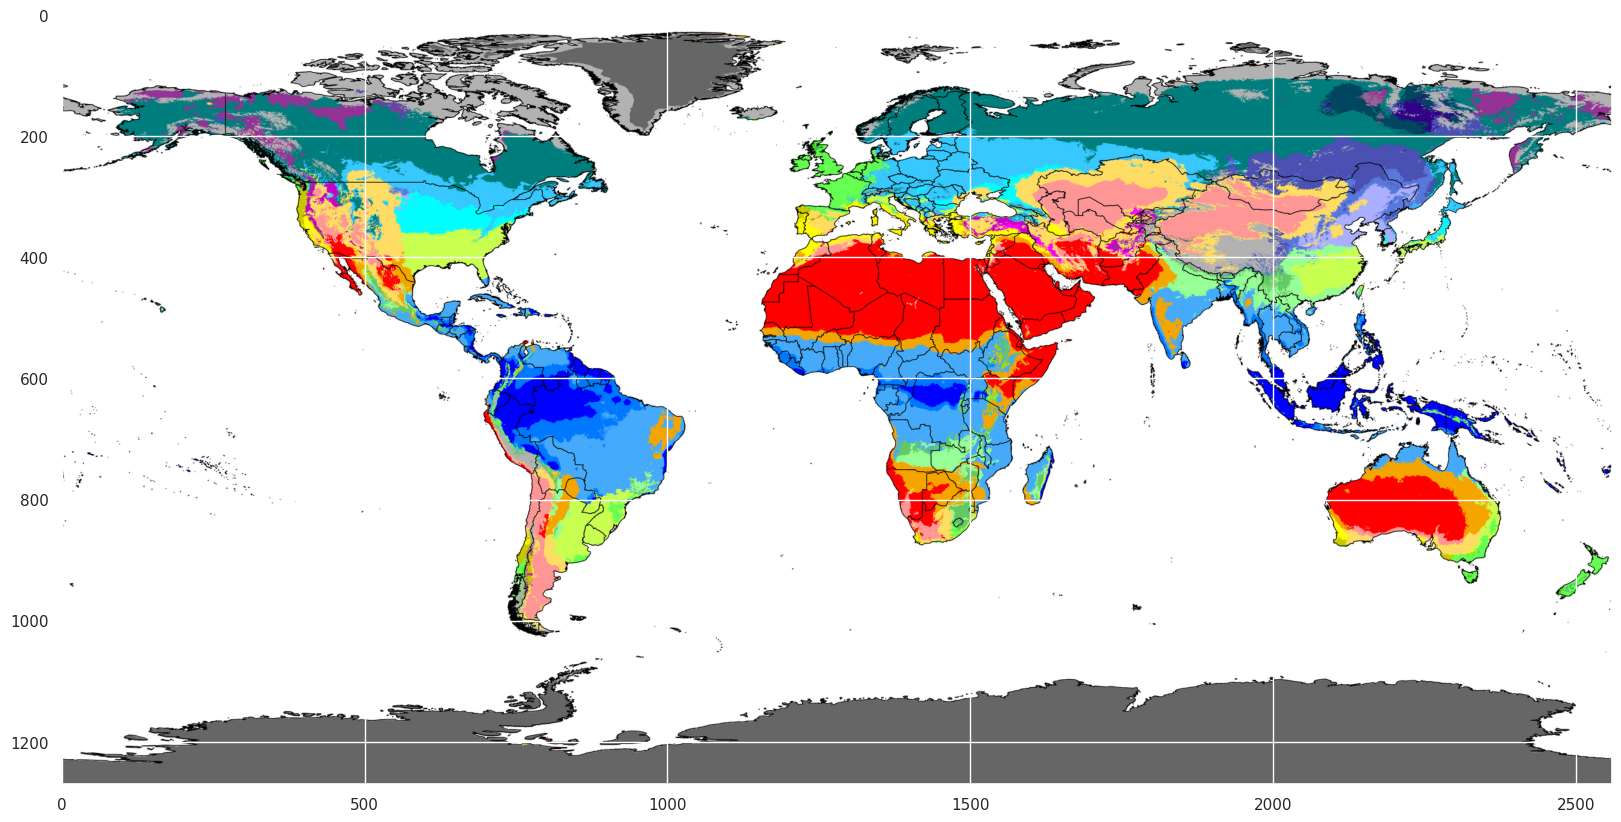

In [86]:
X_fit = df.dropna(axis=1)
# X_fit.head()
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
fig, ax = plt.subplots(figsize=(20, 10))
koppen_map = plt.imread("sample_data/Koppen-Geiger_Climate_Classification_Map.png");
ax.imshow(koppen_map);


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


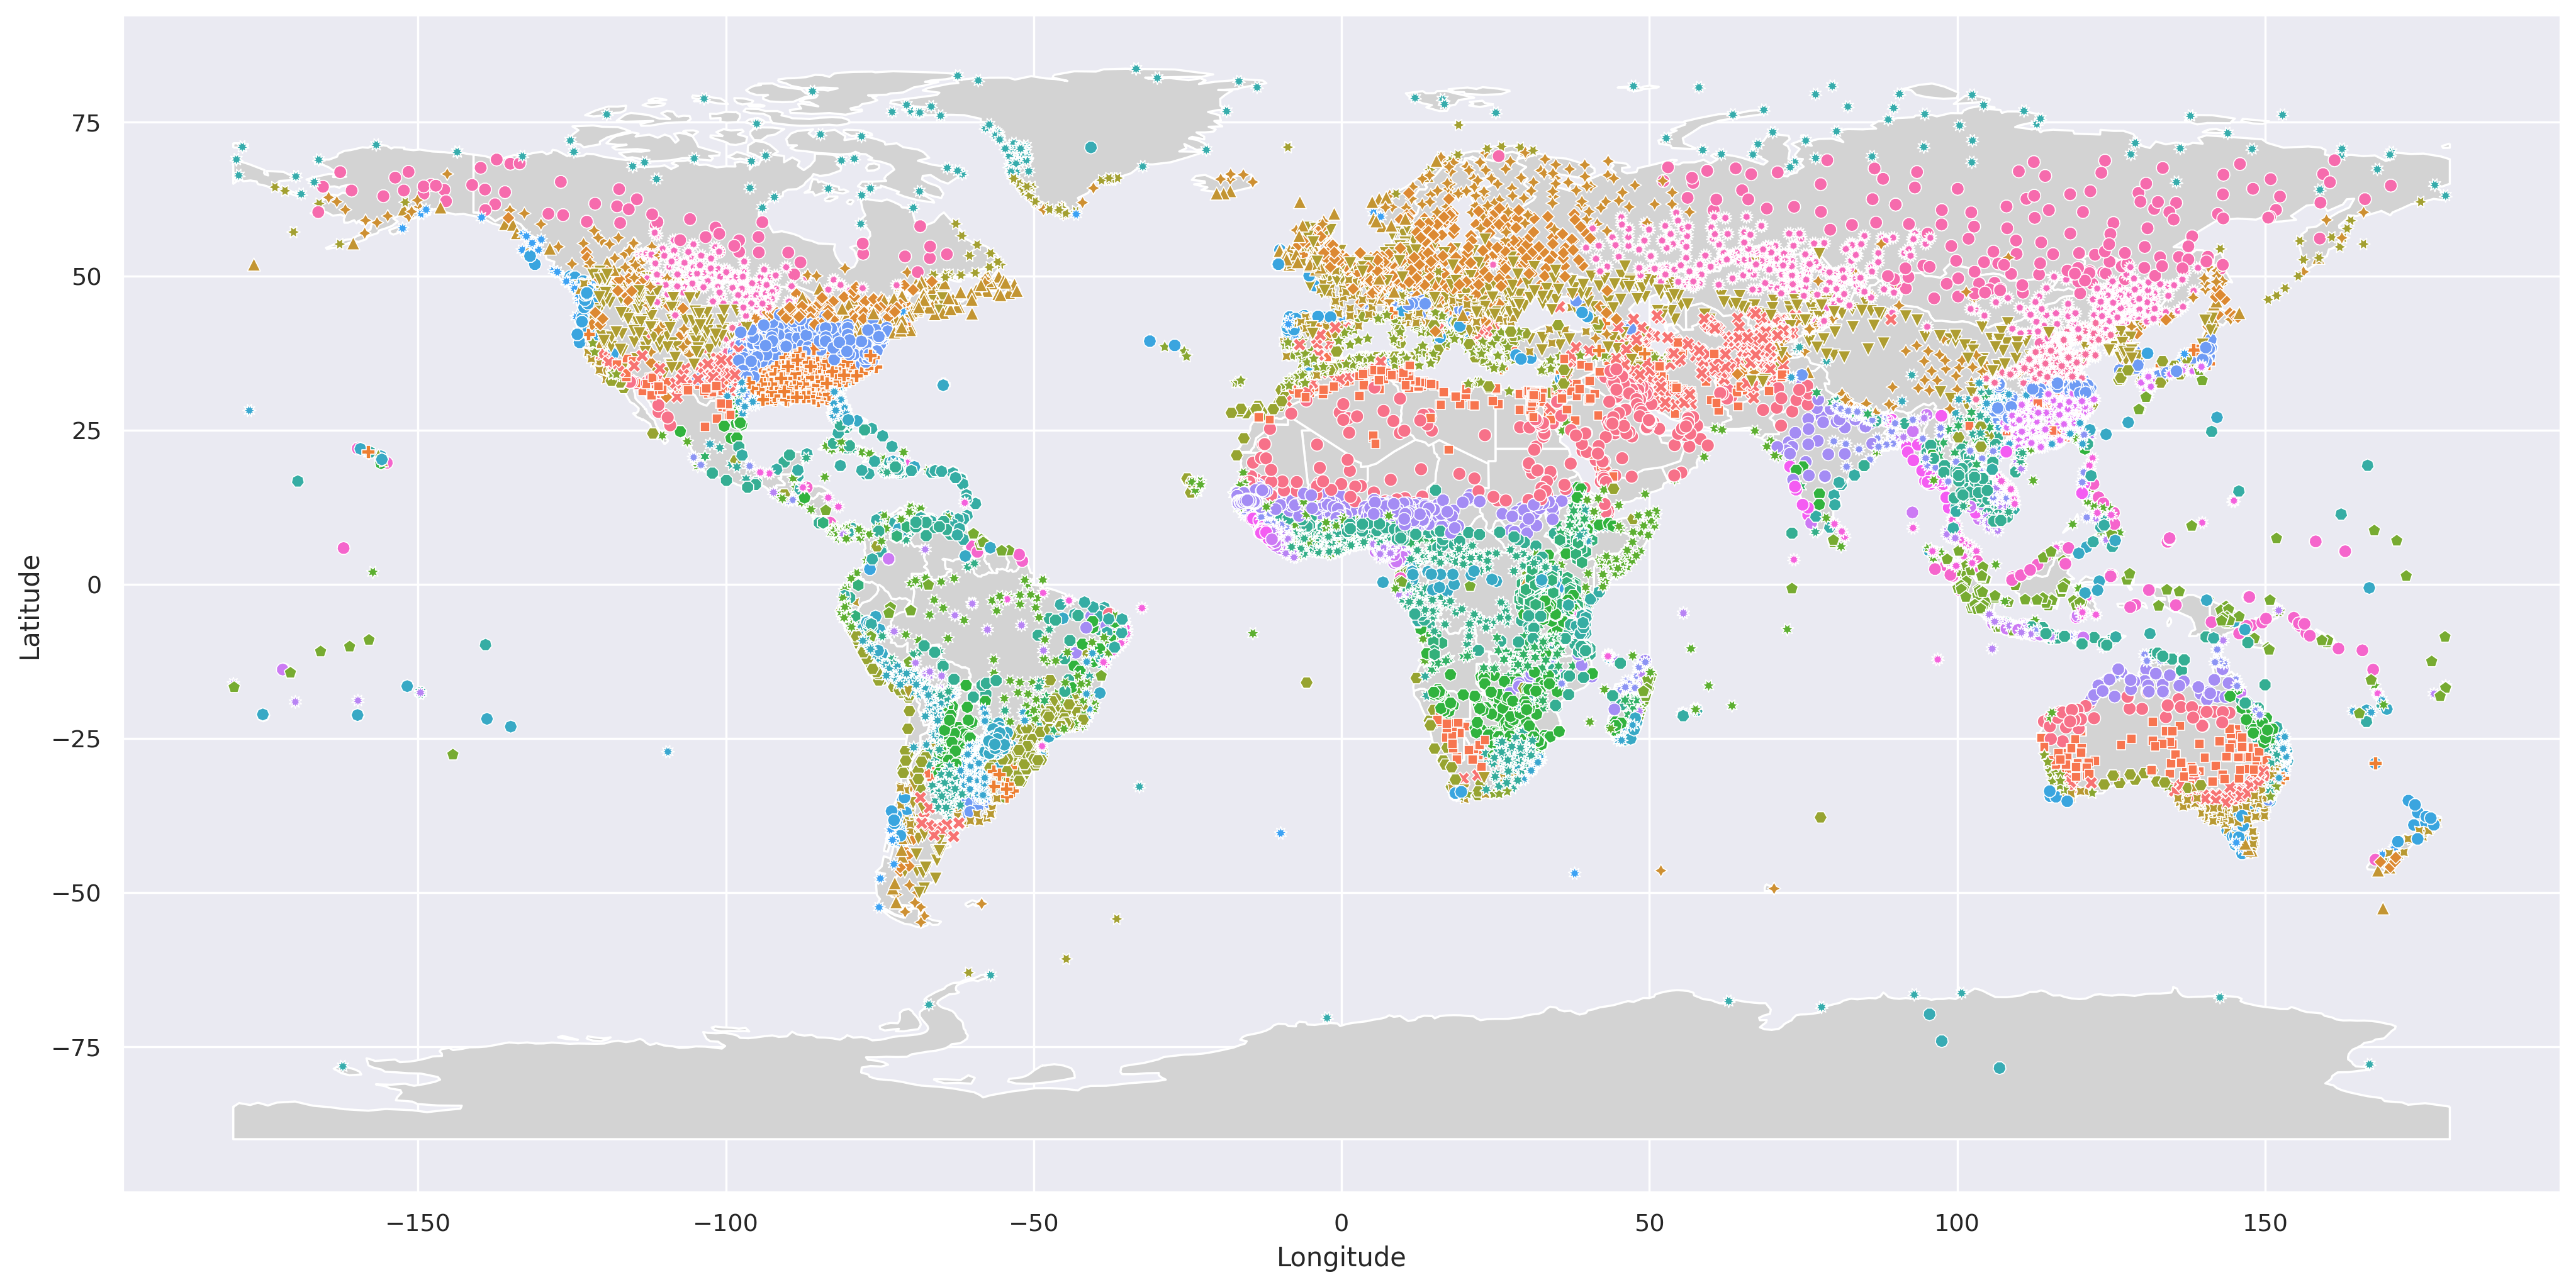

In [91]:
n_clusters = 40
cl =KMeans(n_clusters=n_clusters, random_state=0).fit(X_fit)
fig, ax = plt.subplots(figsize=(20, 10),dpi=250)
worldmap.plot(color="lightgrey", ax=ax)
labels = cl.labels_
df_copy['label'] = labels.astype(str)

#print( df_copy['Country'].str.contains('China').any())

# sns.scatterplot(data=df_copy,x='Longitude',y='Latitude',hue='label',style='label', palette=map_to_koppen_colors(df_copy) );
sns.scatterplot(data=df_copy,x='Longitude',y='Latitude',hue='label',style='label' );

plt.legend([],[], frameon=False)
plt.show()

# Per land Segment data classification using Self Organizing


In [119]:
#now we are using another dataset which deals iwth pixel per pixel rather than per city
import scipy.io
#how is each 3x12 entry associated with their lat and long
data = scipy.io.loadmat('sample_data/training_set.mat')['t']
data_test = scipy.io.loadmat('sample_data/test_set.mat')['t']
data = np.stack(list(data[:, 0]))
print(len(data))
print(data.shape)


66455
(66455, 3, 12)


In [89]:
# prompt: pip install minisom

!pip install minisom


In [136]:
from minisom import MiniSom
flattened_data = data.reshape(data.shape[0], -1)
som = MiniSom(x=20, y=20, input_len=flattened_data.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(flattened_data)
som.train_random(flattened_data, 100)  # Number of iterations can be adjusted
win_map = som.win_map(flattened_data)

In [137]:
labels = np.array([som.winner(x) for x in flattened_data])
print(labels)

[[ 5 11]
 [ 5 11]
 [ 5 11]
 ...
 [ 4 12]
 [ 4 12]
 [ 4 12]]


In [139]:
print(labels.shape)

(66455, 2)


In [151]:
unique_labels = labels[:, 0] * 20 + labels[:, 1]
print(unique_labels.shape)

(66455,)
